# Multivariate Logistic Regression

In [1326]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

### Read data and shuffle the rows in the raw data matrix

In [1327]:
# read csv and save output as numpy array
df = np.loadtxt('breast_cancer.csv', delimiter=',')

In [1328]:
# Print top 5 rows
df[:5]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.,  2.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.,  2.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.,  2.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.,  2.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.,  2.]])

In [1329]:
# shuffle datset
np.random.shuffle(df)

### Replacing the responses with 0 and 1 and divide the dataset into a training set and a test set

In [1330]:
# Replace the responses 2 and 4 with 0 and 1
df[:, -1] = np.where(df[:, -1] == 2, 0, 1)

In [1331]:
# Split feature and target arrays for training and test datasets
split = round(len(df)*0.8) # get number of rows for 80% of dataset
X_train =   df[:split, :-1]
y_train =   df[:split, -1].reshape(-1,1)
X_test =    df[split:, :-1]
y_test =    df[split:, -1].reshape(-1,1)

In [1332]:
# verify proper distribution
print(df.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(683, 10)
(546, 9)
(546, 1)
(137, 9)
(137, 1)


I did allocated 20%, which equals to 137 observations to testing dataset. That is done following standard practice by dividing dataset in 80%-20% ratio for train and test dataset

###  Normalization of training data and train a linear logistic regression model using gradient descent.

In [1333]:
# Define sigmoid function

def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [1334]:
column_mean = X_train.mean(axis=0)
column_std = X_train.std(axis=0)

# Apply Feature Normalization
X_norm = (X_train - column_mean)/ column_std

In [1335]:
# Compute the extended matrix Xe of normalized matrix
n = X_norm.shape[0]
Xe = np.c_[np.ones((n,1)),X_norm]

In [1336]:
# Define cost function:

def cost_function(y, X, b):
    J = -1/n*(y.T.dot(np.log(sigmoid(np.dot(X, b)))) + (1-y).T.dot(np.log(1 - sigmoid(np.dot(X, b)))))
    return J

Cost function at learning rate of 0.5 and number of iterations of 1000 is equal to 0.0714


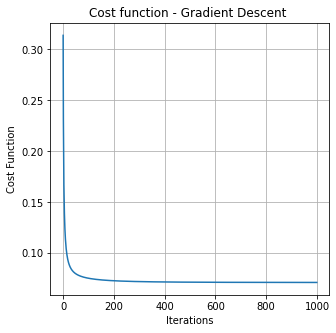

In [1345]:
L = 0.5  # The learning Rate
iterations = 1000  # The number of iterations to perform gradient descent

# define starting beta
beta = np.zeros((10,1))

# create numpy array for plot
cost = np.zeros([iterations, 2])

# Performing Gradient Descent 
for i in range(iterations): 
    beta = beta - L/n*(Xe.T.dot(sigmoid(np.dot(Xe, beta)) - y_train))
    #Cost function:
    J = cost_function(y_train, Xe, beta)
    cost[i, :] = np.c_[J, i]
print(f'Cost function at learning rate of {L} and number of iterations of {iterations} is equal to {round(J[0,0],4)}')

plt.figure(figsize=(5,5))
plt.plot(cost[:, 1], cost[:, 0])
plt.title('Cost function - Gradient Descent ')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.grid(True)

###  What is the training error and the training accuracy?

In [1339]:
# Count training error and round to sigle digit
predicted_values = np.round(sigmoid(np.dot(Xe, beta)))

print(f'Training error is {np.sum(np.not_equal(predicted_values, y_train))} out of total {len(y_train)} values')

Training error is 14 out of total 546 values


In [1340]:
# Calculate accuracy
accuracy = round(np.sum(np.equal(predicted_values, y_train))/len(y_train), 3)

print(f'Accuracy of the model on a training dataset is {accuracy}%')

Accuracy of the model on a training dataset is 0.974%


In [1341]:
round(accuracy, 2)

0.97

### Task 5. What is the number of test error and the test accuracy for your model?

In [1342]:
# Apply Feature Normalization on a testing dataset
X_norm_test = (X_test - column_mean)/ column_std

# Compute the extended matrix Xe_test of normalized matrix for test dataset
n_test = X_norm_test.shape[0]
Xe_test = np.c_[np.ones((n_test,1)),X_norm_test]

In [1343]:
# Count training error and round to single digit
predicted_values_test = np.round(sigmoid(np.dot(Xe_test, beta)))

print(f'Training error is {np.sum(np.not_equal(predicted_values_test, y_test))} out of total {len(y_test)} values')

Training error is 6 out of total 137 values


In [1344]:
# Calculate accuracy
accuracy_test = round(np.sum(np.equal(predicted_values_test, y_test))/len(y_test), 3)

print(f'Accuracy of the model on a training dataset is {accuracy_test}%')

Accuracy of the model on a training dataset is 0.956%


Results are qualitatively very similar after shuffling, most probably due to uniformity of data after normalization. It is worth mentioning that normalization of test dataset is done using mean and standard deviation values form the training dataset to decrease possible overfit of the model. That was discussed further here: "https://www.researchgate.net/post/If-I-used-data-normalization-x-meanx-stdx-for-training-data-would-I-use-train-Mean-and-Standard-Deviation-to-normalize-test-data" <br>
Both training and test errors do not differ much then splitting set in a different train-test ratio and deliver similar results with training accuracy being 1.5-2 higher the test one which is the expected result due to some model variance.
